In [1]:
# try EDA software-> sweetviz, dataprep(terrible), dtale, profiling, lux

In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from dataprep.eda import plot, plot_correlation, plot_missing (terrible)
#import plotly.express as px
import sweetviz as sv
import dtale as dt
import lux as lx
import pandas_profiling as pp


### Load the data

In [3]:
#load data
df = pd.read_csv('/Users/ingluissantana/Desktop/Py/clones/mlbookcamp-code/course-zoomcamp/02-regression/homework_data/AB_NYC_2019.csv')

### Trying some EDA libraries

In [4]:
#use dataprep

#plot_missing(df)
#plot_correlation(df)
#plot(df)


In [5]:
#use sweetviz

#advert_report = sv.analyze(df)
#advert_report.show_html('Advertising.html')

In [6]:
#use dtale

#dt.show(df, ignore_duplicate=True)

In [7]:
#use lux
#df

In [ ]:
#use profiling
#pp.ProfileReport(df_clean, title='DataFrame Profiling Report', html={'style':{'full_width':True}})

### Prepare the data

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
string = list(df.dtypes[df.dtypes=='object'].index)
string

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [11]:
# go thru every string and replace empty spaces
for col in string:
    df[col] = df[col].str.lower().str.replace(' ', '_')

### Checking Price variable

<AxesSubplot:xlabel='price', ylabel='Count'>

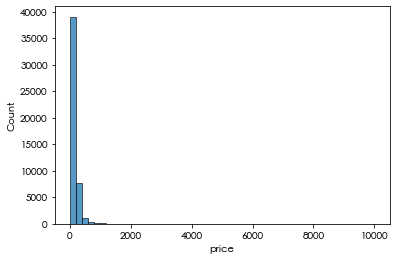

In [26]:
# performd EDA on price variable
sns.histplot(df.price, bins=50)



<AxesSubplot:ylabel='Count'>

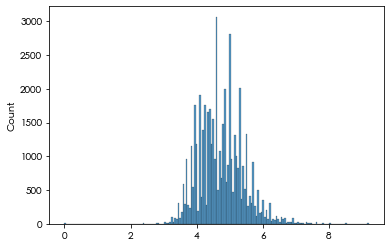

In [27]:
sns.histplot(np.log1p(df.price.values))

### Choosing just the columns i need

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

In [14]:
df_clean = df.copy()

In [15]:
df_clean = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df_clean

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Question 1

Find a feature with missing values. How many missing values does it have?

Sol: 10052

In [16]:
#find how many missing values
df_clean.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

Sol: 3

In [17]:
df_clean.minimum_nights.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [18]:
n = len(df_clean)
#---
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = int(n - (n_val+n_test))
#---
n_total = int(n_val+n_train+n_test)


In [19]:
n, n_val, n_test, n_train, n_total

(48895, 9779, 9779, 29337, 48895)

In [20]:
idx = np.arange(n)
#---
np.random.seed(42)
np.random.shuffle(idx)

In [21]:
df_train = df_clean.iloc[idx[:n_train]]
df_test = df_clean.iloc[idx[n_train:n_train+n_val]]
df_val = df_clean.iloc[idx[n_train+n_val:]]


In [22]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [23]:
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)

In [24]:
del df_train['price']
del df_val['price']
del df_test['price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [30]:
X_train_z = df_train.fillna(0)
X_test_z = df_test.fillna(0)
X_val_z = df_val.fillna(0)

X_train_m = df_train.fillna(df_train.reviews_per_month.mean())
X_test_m = df_test.fillna(df_test.reviews_per_month.mean())
X_val_m = df_val.fillna(df_val.reviews_per_month.mean())

* Train Linear Regression

In [ ]:
a